## Importing library and reading dataset

In [248]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import (accuracy_score, roc_auc_score, confusion_matrix, classification_report,
precision_recall_curve,roc_curve,recall_score, auc, precision_score)

In [6]:
#Reading credit card dataset
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
print(df.shape) #Printing dimension lengths of dataset
df.isnull().any().any() #checking for any missing values

(284807, 31)


False

In [40]:
print('Number of fraudulent transactions is %.0f' %(sum(df.Class==1)))
print('Percentage of fraudulent transactions is {}%' .format(round(sum(df.Class==1)*100/len(df),3)))

Number of fraudulent transactions is 492
Percentage of fraudulent transactions is 0.173%


##### The dataset has 284807 records of transactions of which 492 are fraudulent. It has 30 anonymized input variables and a Class which is 0 or 1

In [68]:
#Checking normality of variables
var = df.drop(['Class'],axis=1).columns.tolist()
norm_df = df[var].apply(lambda x:stats.normaltest(x)[1])

norm_df<0.05 #Normality check of each variable with p value 0.05

Time      True
V1        True
V2        True
V3        True
V4        True
V5        True
V6        True
V7        True
V8        True
V9        True
V10       True
V11       True
V12       True
V13       True
V14       True
V15       True
V16       True
V17       True
V18       True
V19       True
V20       True
V21       True
V22       True
V23       True
V24       True
V25       True
V26       True
V27       True
V28       True
Amount    True
dtype: bool

In [83]:
#Standardization of input variables
scaler = StandardScaler()
scaler.fit(df[var].values)
std_df = pd.DataFrame(scaler.transform(df[var].values), columns=var)
std_df['Class'] = df['Class']
std_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [84]:
#Splitting data into train and test data:
x = std_df.drop(['Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=0)

## Fitting logistic regression:

In [103]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

pred_train = lr_model.predict(x_train)

print(confusion_matrix(pred_train, y_train))

[[190464    119]
 [    26    211]]


[[93810    87]
 [   15    75]]


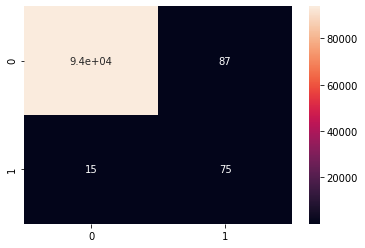

In [297]:
pred_test = lr_model.predict(x_test)

print(confusion_matrix(pred_test, y_test))

sns.heatmap(confusion_matrix(pred_test, y_test), annot=True)
plt.show()

In [132]:
accuracy_score(y_test, pred_test)

0.9992339366082543

In [133]:
accuracy_score(y_train, pred_train)

0.9992401215805471

In [135]:
sum(pred_test==1)

116

In [137]:
sum(y_test==1)

162

### Computing AUC and ROC curve:

In [144]:
probs = lr_model.predict_proba(x_test)
print('AUC = ',roc_auc_score(y_test, probs[:,1]))

AUC =  0.9677793238660101


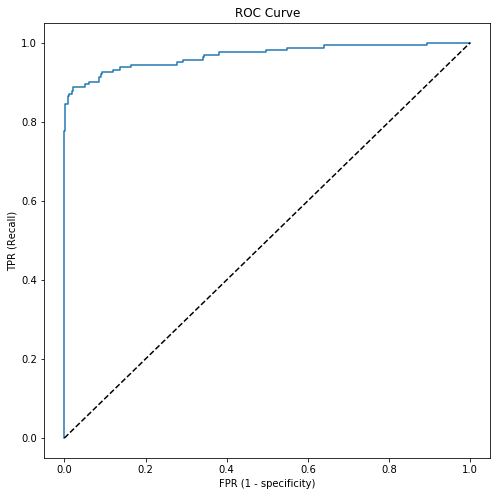

Area under curve (AUC):  0.9677793238660101
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.89      0.64      0.74       162

    accuracy                           1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987



In [159]:
fpr,tpr,_ = roc_curve(y_test, probs[:,1])

fig, ax = plt.subplots(figsize = (8,8))
plt.title('ROC Curve')
plt.xlabel('FPR (1 - specificity)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed', color='black')
           
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

print(classification_report(y_test, pred_test))

### Change regulation parameter:

In [222]:
# Find the best C value
C_param = [0.001, 0.01, 0.1, 1, 10, 100]

AUC_table = pd.DataFrame(columns = ['C_parameter', 'AUC_score'])
AUC_table['C_parameter'] = C_param

for i,j in enumerate(C_param):
    lr = LogisticRegression(penalty = 'l2', C = j, random_state = 0)
    lr.fit(x_train, y_train)
    
    probs = lr.predict_proba(x_test)
    
    AUC_table.iloc[i,1] = roc_auc_score(y_test, probs[:,1])

In [223]:
AUC_table #0.001 is the best

,C_parameter,AUC_score
0,0.001,0.98317
1,0.010,0.978598
2,0.100,0.970447
3,1.000,0.967779
4,10.000,0.967455
5,100.000,0.967423


In [295]:
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0)
lr_model = lr.fit(x_train, y_train)

mythreshold = 0.5
preds = (lr_model.predict_proba(x_test)[:,1] >= mythreshold)#.astype(int)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.83      0.46      0.60       162

    accuracy                           1.00     93987
   macro avg       0.92      0.73      0.80     93987
weighted avg       1.00      1.00      1.00     93987



### Though the regulation parameter C=0.001 gives a less overall error, it gives a bad recall and precision score which are very important parameters for our classification problem

## Choosing the best threshold for Logistic Regression:

In [299]:
lr = LogisticRegression(penalty = 'l2', C = 1, random_state = 0)
lr_model = lr.fit(x_train, y_train)

threshold_table = pd.DataFrame(columns = ['threshold', 'recall', 'precision'])
threshold_range = np.arange(0.1,1,0.1)
threshold_table['threshold'] = threshold_range

for i,j in enumerate(threshold_range):
    preds = (lr_model.predict_proba(x_test)[:,1] >= j)
    threshold_table.iloc[i,1] = recall_score(y_test, preds)
    threshold_table.iloc[i,2] = precision_score(y_test, preds)

threshold_table

,threshold,recall,precision
0,0.1,0.777778,0.812903
1,0.2,0.722222,0.8125
2,0.3,0.691358,0.848485
3,0.4,0.67284,0.872
4,0.5,0.635802,0.887931
5,0.6,0.574074,0.877358
6,0.7,0.537037,0.87
7,0.8,0.493827,0.869565
8,0.9,0.462963,0.862069


### A threshold of 0.1 gives the highest recall value of 78% and precision is still over 80%. So, I am going to try and lower the threshold even more so the recall is over 80% while still maintaining a precision of 75%

In [286]:
threshold_table = pd.DataFrame(columns = ['threshold', 'recall', 'precision'])
threshold_range = np.arange(0.05,0.11,0.01)
threshold_table['threshold'] = threshold_range

for i,j in enumerate(threshold_range):
    preds = (lr_model.predict_proba(x_test)[:,1] >= j)
    threshold_table.iloc[i,1] = recall_score(y_test, preds)
    threshold_table.iloc[i,2] = precision_score(y_test, preds)

threshold_table

,threshold,recall,precision
0,0.05,0.808642,0.740113
1,0.06,0.796296,0.754386
2,0.07,0.790123,0.775758
3,0.08,0.777778,0.7875
4,0.09,0.777778,0.802548
5,0.10,0.777778,0.812903


### The ideal threshold for my expected recall is between 0.05 and 0.06. Let's keep it at 0.055

In [301]:
preds = (lr_model.predict_proba(x_test)[:,1] >= 0.055)

tab = confusion_matrix(preds, y_test)
print(tab)
print()
print('recall is '+ str(recall_score(y_test, preds)))
print('precision is '+ str(precision_score(y_test, preds)))
print('Overall test accuracy is '+ str(accuracy_score(y_test, preds)))

[[93782    32]
 [   43   130]]

recall is 0.8024691358024691
precision is 0.7514450867052023
Overall test accuracy is 0.9992020173002649


## In my final model, I am getting a decent recall of 80% and precision of 75%. This means the model has identified 80% of fraudulent transactions. The overall test accuracy of the model is 99.9%